## Orbite planetarie

Il file `planets.csv` contiene alcuni dati riguardanti l'orbita dei pianeti del sistema solare attorno al sole (vedi https://nssdc.gsfc.nasa.gov/planetary/factsheet/index.html per un dataset più completo)

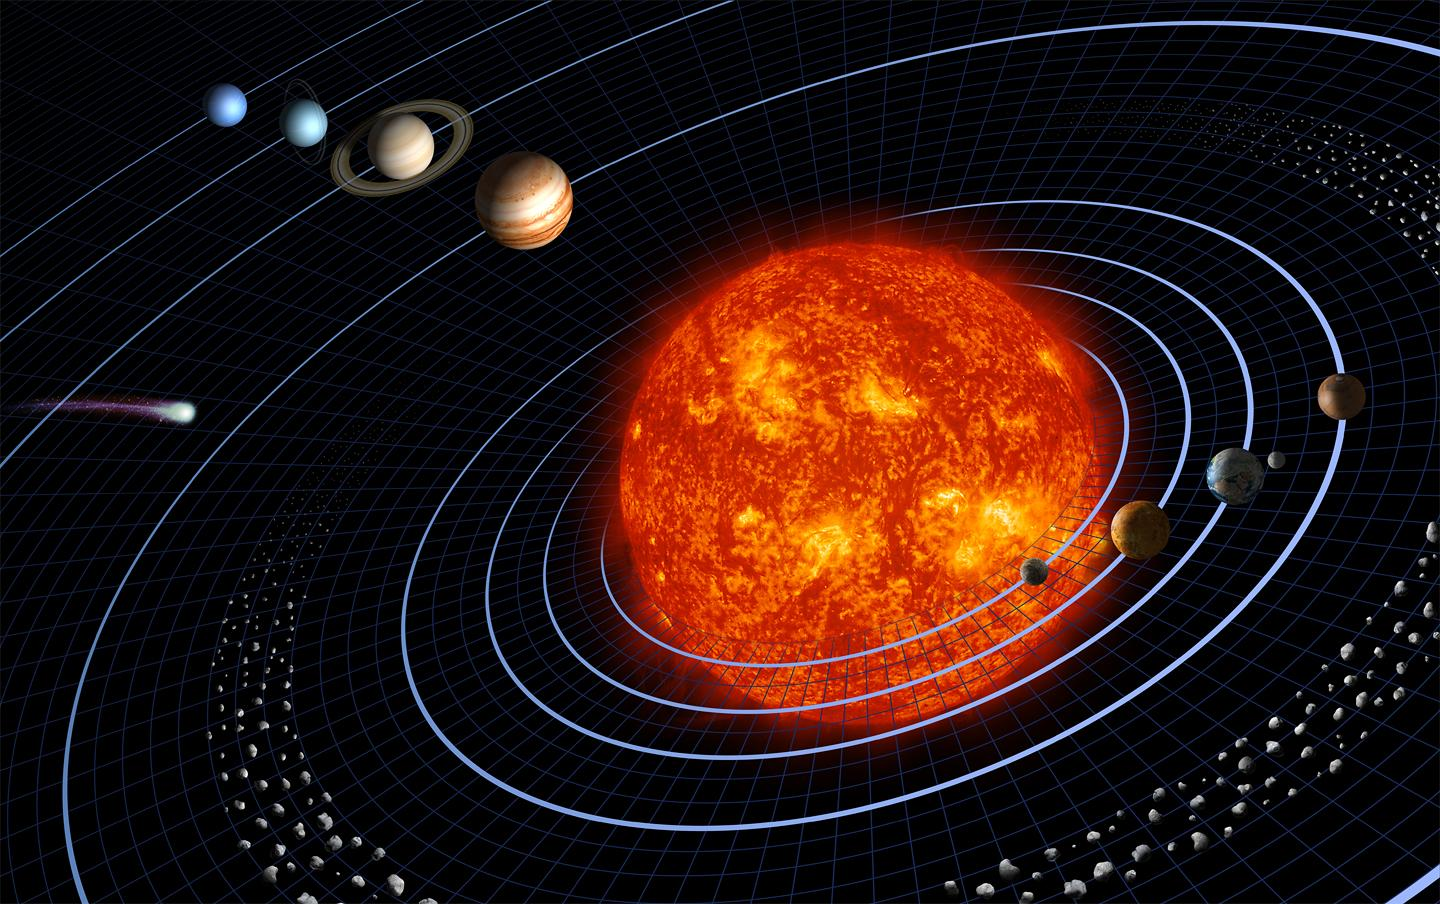

Tracciamo il periodo $\tau$ (in secondi) in funzione della distanza orbitale media $R$ (in metri)

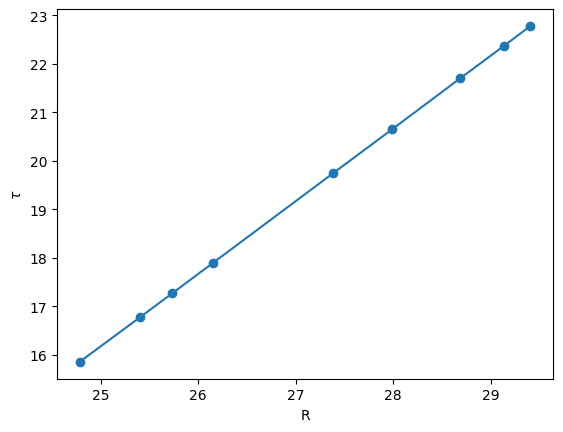

In [2]:
import numpy
import matplotlib.pyplot as plt

data = numpy.loadtxt('planets.csv', unpack=True, delimiter=',', usecols=(1, 2, 3, 4))
m, r, tau, R = data
#plt.plot(R, tau, 'o-')
plt.xlabel('R')
plt.ylabel(r'$\tau$')
plt.plot(numpy.log(R), numpy.log(tau), 'o-')

Fittiamo i dati in scala logaritmica a una retta (regressione lineare).

Slope: 1.4978205238992712


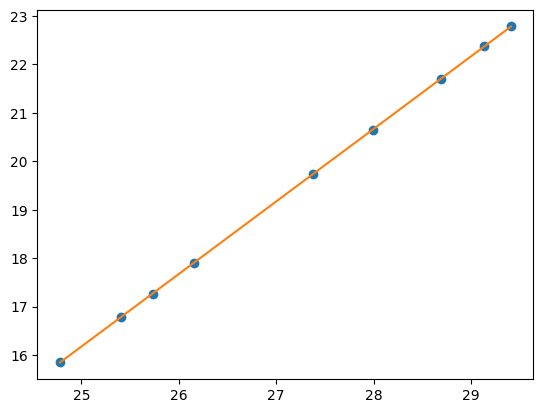

In [3]:
def linear_fit(x, y):
    """
    Simple linear regression of input `x` and `y` lists (or numpy
    arrays), without uncertainty estimate

    Return: a and b coefficients in a*x + b
    """
    # Use numpy.sum for large arrays
    assert len(x) == len(x)
    n = len(x)
    dof = n - 2
    sx = sum(x)
    sy = sum(y)
    sxy = sum(x*y)
    sxx = sum(x**2)

    # Linear fit to a*x+b
    a = (n*sxy - sx*sy) / (n*sxx - sx**2)
    b = (sy - a*sx) / n

    return a, b

a, b = linear_fit(numpy.log(R), numpy.log(tau))
print(f'Slope: {a}')
plt.plot(numpy.log(R), numpy.log(tau), 'o')
plt.plot(numpy.log(R), a*numpy.log(R) + b, '-')